Fitted N: 1322.137293120288 +/- 9.615300289691898e+23
Fitted a: 2.476807028939122 +/- 3.7908674679155704e+16


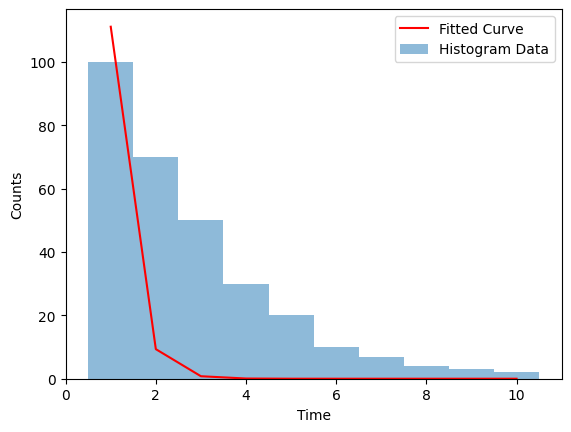

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_decay(t, N, a):
    return N * np.exp(-a * t)

def log_likelihood(t, N, a):
    f_i = exponential_decay(t, N, a)
    log_likelihood = -np.sum( f_i - counts * np.log(f_i))
    return log_likelihood

time = np.arange(1, 11)
counts = np.array([100, 70, 50, 30, 20, 10, 7, 4, 3, 2])

initial_guess = (100, 0.1)
pars, covs = curve_fit(log_likelihood, time, counts, p0 = initial_guess)

N_fit, a_fit = pars

plt.bar(time, counts, width=1.0, alpha=0.5, label='Histogram Data')
plt.plot(time, exponential_decay(time, N_fit, a_fit), 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()


print("Fitted N:", N_fit,"+/-",covs[0][0])
print("Fitted a:", a_fit,"+/-",covs[1][1])
